### 多项式回归模型

下面我们更进一步，讲一讲多项式回归。什么是多项式回归呢？非常简单，根据上面的线性回归模型

$$
\hat{y} = w x + b
$$

这里是关于 x 的一个一次多项式，这个模型比较简单，没有办法拟合比较复杂的模型，所以我们可以使用更高次的模型，比如

$$
\hat{y} = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \cdots
$$

这样就能够拟合更加复杂的模型，这就是多项式模型，这里使用了 x 的更高次，同理还有多元回归模型，形式也是一样的，只是出了使用 x，还是更多的变量，比如 y、z 等等，同时他们的 loss 函数和简单的线性回归模型是一致的。

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.autograd import Variable

In [3]:


# 定义一个多变量函数
w_target = np.array([0.5, 3, 2.4])   # 定义参数
b_target = np.array([0.9])     

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0], w_target[0], w_target[1], w_target[2]) # 打印出函数的式子

print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


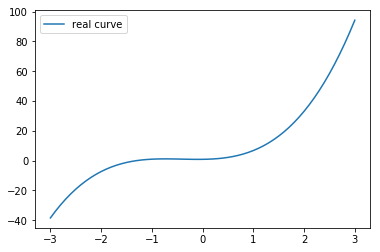

In [8]:
# 画出这个函数的曲线
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3

plt.plot(x_sample, y_sample, label='real curve')
plt.legend()

In [11]:
#  构建数据 x  y
x_train = np.stack([x_sample * i for i in range(1, 4)], axis=1) # x 是一个如下矩阵 [x, x^2, x^3]    维度(1,3)
x_train = torch.from_numpy(x_train).float()   # 转换成 float tensor

y_train = torch.from_numpy(y_sample).unsqueeze(1)   # 转换程 float tensor   增加了一个维度  参考https://blog.csdn.net/flysky_jay/article/details/81607289


In [13]:
# 定义参数和模型
w = Variable(torch.randn(3, 1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

# 将 x 和 y 转换程 Variable
x_train = Variable(x_train)
y_train = Variable(y_train)

def multi_linear(x):
    return torch.mm(x, w) + b

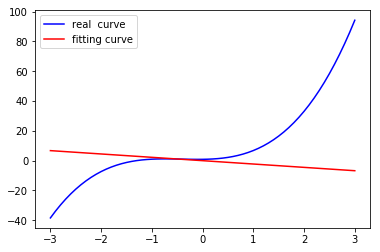

In [19]:
# 画出y模型
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:,0], y_sample, 'b', label='real  curve')
plt.plot(x_train.data.numpy()[:,0], y_pred.data.numpy(), 'r', label='fitting curve')
plt.legend()
plt.show()

In [24]:
y_pred.shape

torch.Size([61, 1])

In [25]:
y_train.shape

torch.Size([61, 1])

In [33]:
# 计算误差
def get_loss(y_, y_train):
    return torch.mean((y_-y_train) ** 2)

# 计算误差，这里的误差和一元的线性模型的误差是相同的，前面已经定义过了 get_loss
loss = get_loss(torch.FloatTensor(y_pred), torch.FloatTensor(y_train))
print(loss)

TypeError: expected Float (got Double)